<h2 style="color : red">Linear Regression from scratch using python</h2>

<h4>Sample Example on Iris Dataset</h4>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

<h2>Linear line equation</h2>

<img src="linear_equation.png" >

In [91]:
# Creating a class for linear regression
class LinearRegression:
    '''
    Implementation of Linear Regression from scratch using python.
    Attributes:
    learning_rate : This attribute is used for gradient descent as learning rate to train the model.
    iterations : Used for training the models, it's also known as epochs.
    formula : f(x) = M.X + C
    X = This variable consists of independent variables data from the dataset 'M(slope), X, C(intercept).
    y = This consists of dependent variable data from variable 'f(x)'.
    rows = Number of rows in the dataset.
    cols = Number of columns in the dataset.
    weights : Slope i.e: "M" in formula.
    '''
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    # Passing dataset to model
    def fit(self, X, y):
        # Number of rows and columns in the dataset.
        self.rows, self.cols = X.shape
        # Initializing weights to zero to train model from origin
        self.weights = np.zeros(self.cols)
        # Initializing bias "C" in formula
        self.bias = 0

        self.X = X
        self.y = y

        # Implementing gradient descent
        for _ in range(self.iterations):
            self.update_weights()

        return self
    
    def update_weights(self):
        Y_pred = self.predict(self.X)
        # Implementing derivatives to weight and bias
        derivative_weight = - (2 * (self.X.T).dot(self.y - Y_pred)) / self.rows
        derivative_bias = - 2 * np.sum(self.y - Y_pred) / self.rows

        # Updating weights
        self.weights = self.weights - self.learning_rate * derivative_weight
        self.bias = self.bias - self.learning_rate * derivative_bias

        return self
    
    # Implementing 'f(x)' line formula 
    def predict(self, X):
        return X.dot(self.weights) + self.bias
    
    

<h4>Using Iris dataset for Testing</h4>

In [92]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [93]:
# Using required features
X = df[['petal length (cm)']].values
y = df['petal width (cm)'].values

In [94]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f"""
X_train: {len(X_train)}
X_test: {len(X_test)}
y_train: {len(y_train)}
y_test: {len(y_test)}
""")



X_train: 120
X_test: 30
y_train: 120
y_test: 30



In [96]:
model = LinearRegression(iterations=1000, learning_rate=0.01)
model.fit(X_train, y_train)


In [97]:
y_preds = model.predict(X_test)

np.ravel([np.argmax(i) for i in y_preds])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

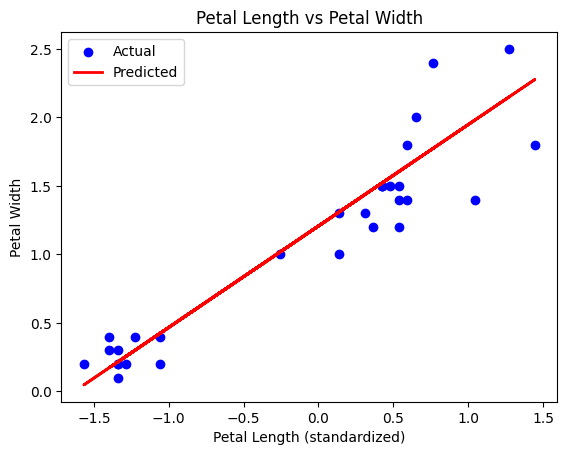

In [98]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_preds, color='red', linewidth=2, label='Predicted')
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [99]:
print(model.__doc__)


    Implementation of Linear Regression from scratch using python.
    Attributes:
    learning_rate : This attribute is used for gradient descent as learning rate to train the model.
    iterations : Used for training the models, it's also known as epochs.
    formula : f(x) = M.X + C
    X = This variable consists of independent variables data from the dataset 'M(slope), X, C(intercept).
    y = This consists of dependent variable data from variable 'f(x)'.
    rows = Number of rows in the dataset.
    cols = Number of columns in the dataset.
    weights : Slope i.e: "M" in formula.
    
